In [13]:
import numpy as np
# Kmeans clustering
from sklearn.cluster import KMeans
from decomposition import CustomPCA
# plotting clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# dataset
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784")
X = mnist.data.to_numpy()/255.0

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [25]:
X = X[:2000]
y = mnist.target[:2000]

In [26]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
clusters = kmeans.labels_

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
pca_20d = CustomPCA(n_components=20)
scaled_X = pca_20d.fit_transform(X)

# plotting the clusters obtained with top 3 eigen vectors

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/1099905621.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/1099905621.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 

Text(0.5, 0.92, '3D PCA representation with Clustering')

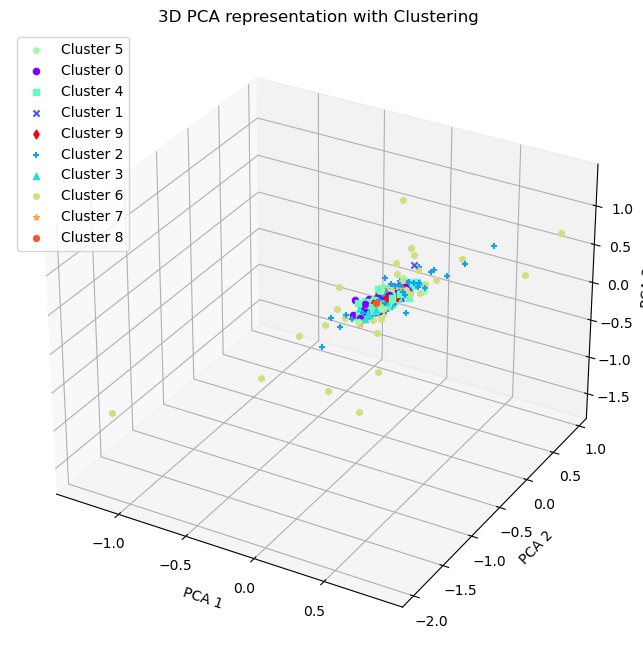

In [47]:
three_d_axes = pca_20d.E
# pick the first 3 axes
data = np.dot(X, three_d_axes[:, :3])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')

# Picking 3 random values from 20 components

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/274729044.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/274729044.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0]

Text(0.5, 0.92, '3D PCA representation with Clustering')

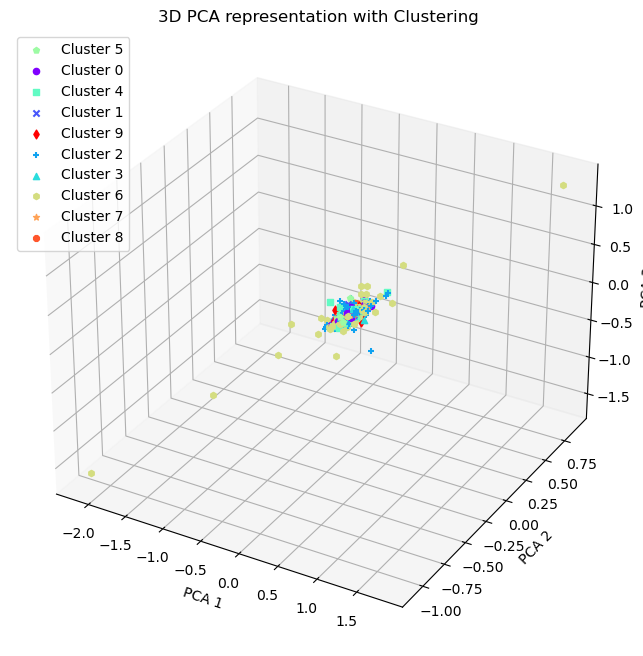

In [55]:
three_d_axes = pca_20d.E
# pick the first 3 axes
random_idxs = np.random.choice(20, 3, replace=False)
data = np.dot(X, three_d_axes[:, random_idxs])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 

Text(0.5, 0.92, '3D PCA representation with Clustering')

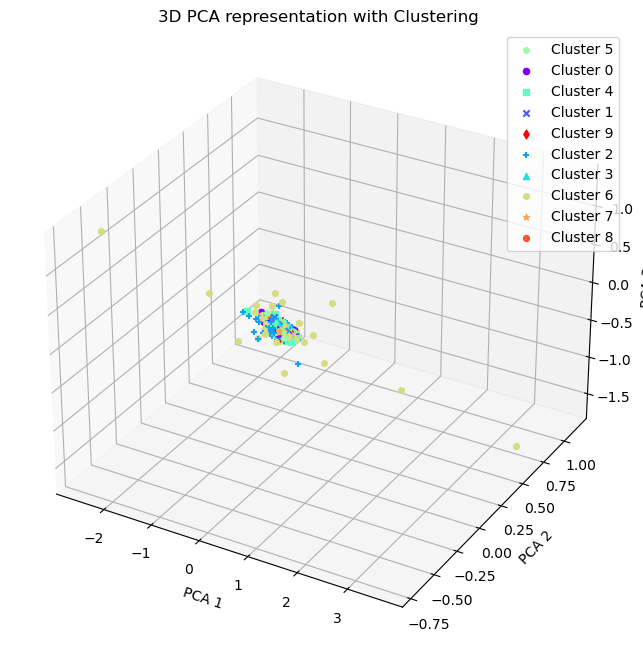

In [56]:
three_d_axes = pca_20d.E
# pick the first 3 axes
random_idxs = np.random.choice(20, 3, replace=False)
data = np.dot(X, three_d_axes[:, random_idxs])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 

Text(0.5, 0.92, '3D PCA representation with Clustering')

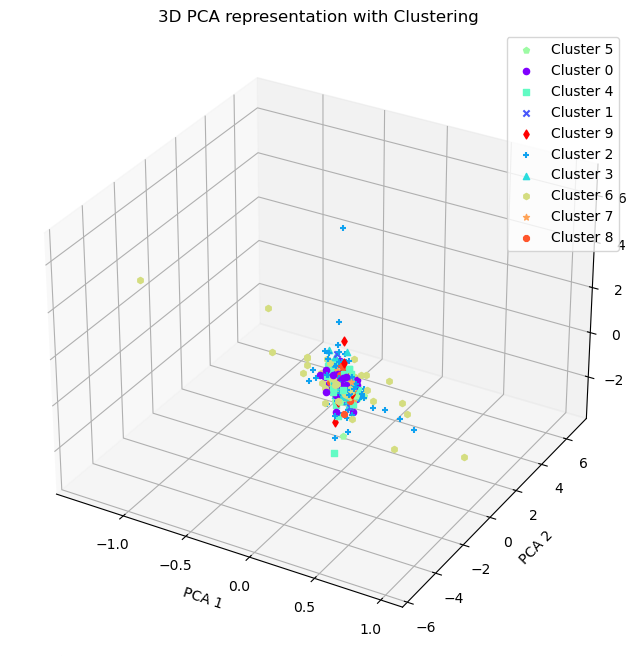

In [57]:
three_d_axes = pca_20d.E
# pick the first 3 axes
random_idxs = np.random.choice(20, 3, replace=False)
data = np.dot(X, three_d_axes[:, random_idxs])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 

Text(0.5, 0.92, '3D PCA representation with Clustering')

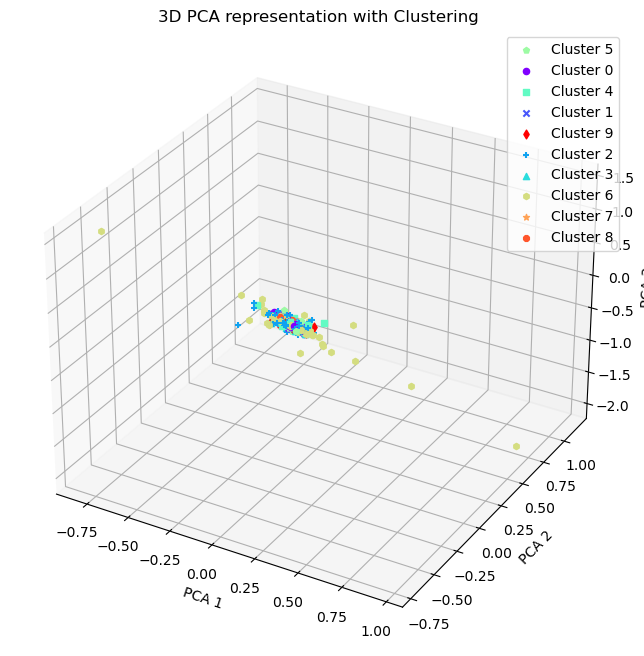

In [58]:
three_d_axes = pca_20d.E
# pick the first 3 axes
random_idxs = np.random.choice(20, 3, replace=False)
data = np.dot(X, three_d_axes[:, random_idxs])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_37295/3165477720.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(data[i, 

Text(0.5, 0.92, '3D PCA representation with Clustering')

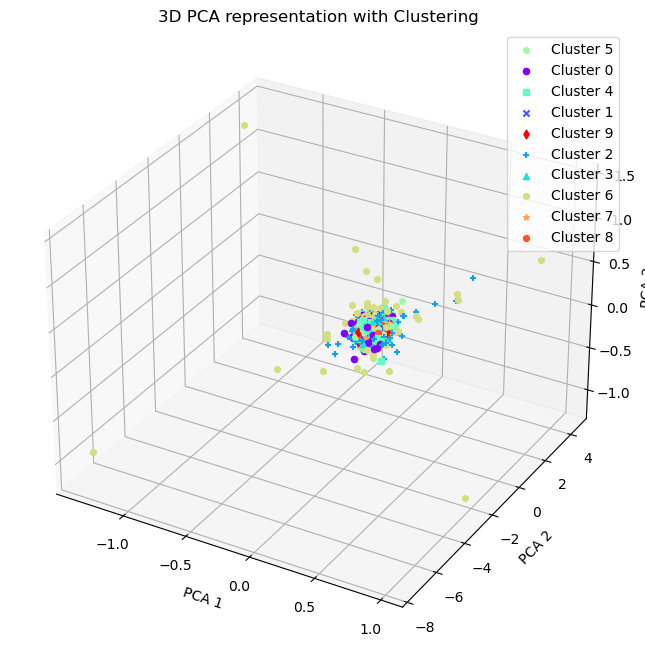

In [59]:
three_d_axes = pca_20d.E
# pick the first 3 axes
random_idxs = np.random.choice(20, 3, replace=False)
data = np.dot(X, three_d_axes[:, random_idxs])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
marker_map = {'0' : 'o', '1': 'x', '2': '+', '3': '^', '4': 's', '5': 'p', '6':'h', '7':'*', '8':'8', '9':'d'}
plotted_cluster = set()
for i in range(len(data)):
    # label = kmeans.labels_[i]
    if y[i] not in plotted_cluster:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]], label=f'Cluster {int(y[i]) % len(colors)}')
        plotted_cluster.add(y[i])
    else:
        ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[int(y[i]) % len(colors)], marker=marker_map[y[i]])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.title('3D PCA representation with Clustering')